__Introduction__
This project explores the relationship between GDP and life expectancy across various countries, utilizing a dataset spanning from 2000 to 2015. The primary objectives are to analyze trends in life expectancy and GDP over time, examine the correlation between these variables, and understand how they vary between different nations.

__Dataset Overview:__
The dataset includes information on life expectancy at birth and GDP for several countries. By examining these variables, we aim to uncover patterns and insights into how economic growth influences health outcomes globally.

__Objectives:__

__Trend Analysis:__ Investigate how life expectancy and GDP have evolved over time in selected countries.
Correlation Study: Assess the strength and significance of the relationship between GDP and life expectancy.
Country-Specific Insights: Evaluate the trends and correlations at an individual country level to identify unique patterns and anomalies.<br>
__Distribution Analysis:__ Explore the distribution of life expectancy to understand global disparities in health outcomes.
The analysis incorporates statistical methods and visualizations to provide a comprehensive overview of the data, offering insights into the interplay between economic development and health improvements.

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Load the data and inspect its structure:

In [2]:
data = r"C:\Users\piotr\Downloads\Life-Expectancy-and-GDP-Starter\all_data.csv"
df = pd.read_csv(data)
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [4]:
# Convert GDP to billions
df['GDP_in_billions'] = df['GDP'] / 10**9
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP  \
0   Chile  2000                              77.3 77860932152.0   
1   Chile  2001                              77.3 70979923960.0   
2   Chile  2002                              77.8 69736811435.0   
3   Chile  2003                              77.9 75643459840.0   
4   Chile  2004                              78.0 99210392858.0   

   GDP_in_billions  
0             77.9  
1             71.0  
2             69.7  
3             75.6  
4             99.2  


Check for missing values and data types to ensure the dataset is clean and ready for analysis

In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
 4   GDP_in_billions                   96 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ KB
None
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
GDP_in_billions                     0
dtype: int64


The dataset is clean with no missing values. GDP is converted to billions for easier interpretation

Basic descriptive statistics to get an overview of the data

In [6]:
print(df.describe())

        Year  Life expectancy at birth (years)              GDP  \
count   96.0                              96.0             96.0   
mean  2007.5                              72.8  3880498570768.4   
std      4.6                              10.7  5197561310975.9   
min   2000.0                              44.3     4415702800.0   
25%   2003.8                              74.5   173301750000.0   
50%   2007.5                              76.8  1280220000000.0   
75%   2011.2                              78.9  4067510000000.0   
max   2015.0                              81.0 18100000000000.0   

       GDP_in_billions  
count             96.0  
mean            3880.5  
std             5197.6  
min                4.4  
25%              173.3  
50%             1280.2  
75%             4067.5  
max            18100.0  


Let's asses whether life expectancy increased over time in the six nations

     Country  Year  Life expectancy at birth (years)
0      Chile  2000                              77.3
1      Chile  2001                              77.3
2      Chile  2002                              77.8
3      Chile  2003                              77.9
4      Chile  2004                              78.0
..       ...   ...                               ...
91  Zimbabwe  2011                              54.9
92  Zimbabwe  2012                              56.6
93  Zimbabwe  2013                              58.0
94  Zimbabwe  2014                              59.2
95  Zimbabwe  2015                              60.7

[96 rows x 3 columns]


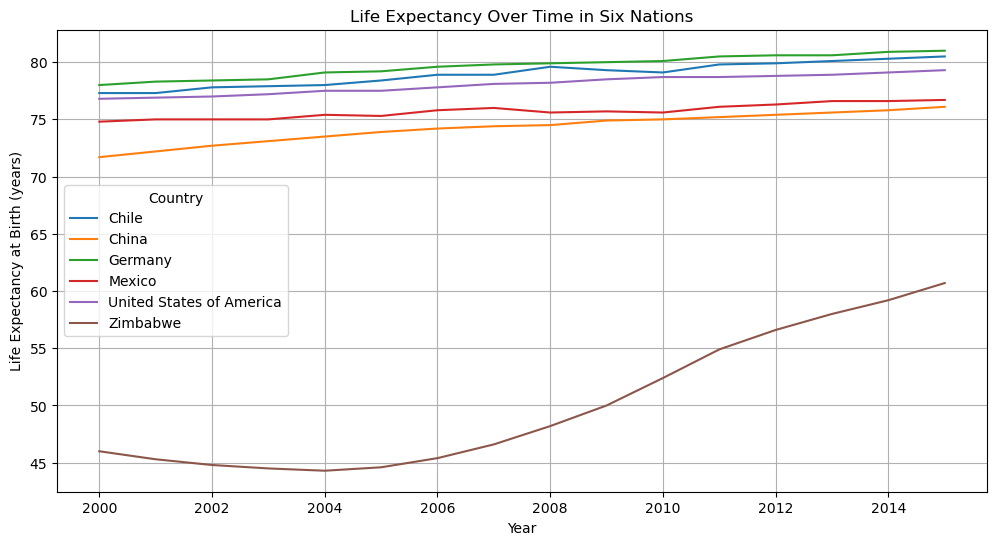

In [7]:
# Group by Country and Year, then calculate the average life expectancy
life_expectancy_trend = df.groupby(['Country', 'Year'])['Life expectancy at birth (years)'].mean().reset_index()
print(life_expectancy_trend)

# Plot the life expectancy trend for each country
plt.figure(figsize=(12, 6))
for country in life_expectancy_trend['Country'].unique():
    country_data = life_expectancy_trend[life_expectancy_trend['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy at birth (years)'], label=country)

plt.title('Life Expectancy Over Time in Six Nations')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

All countries show an overall increase in life expectancy over the period, though the rates of increase vary between the analysed countries. Notably, Zimbabwe, which started with the lowest life expectancy, experienced the most significant improvement, rising sharply over the years, possibly indicating substantial health and economic recovery. Germany, the United States, and Chile, which had higher initial life expectancies, showed steady but less dramatic increases, suggesting continued but stable improvements in their already advanced healthcare systems. China and Mexico also demonstrated consistent upward trends, reflecting ongoing developments in health and economic conditions.

Let's assess whether GDP increased over time in the six nations

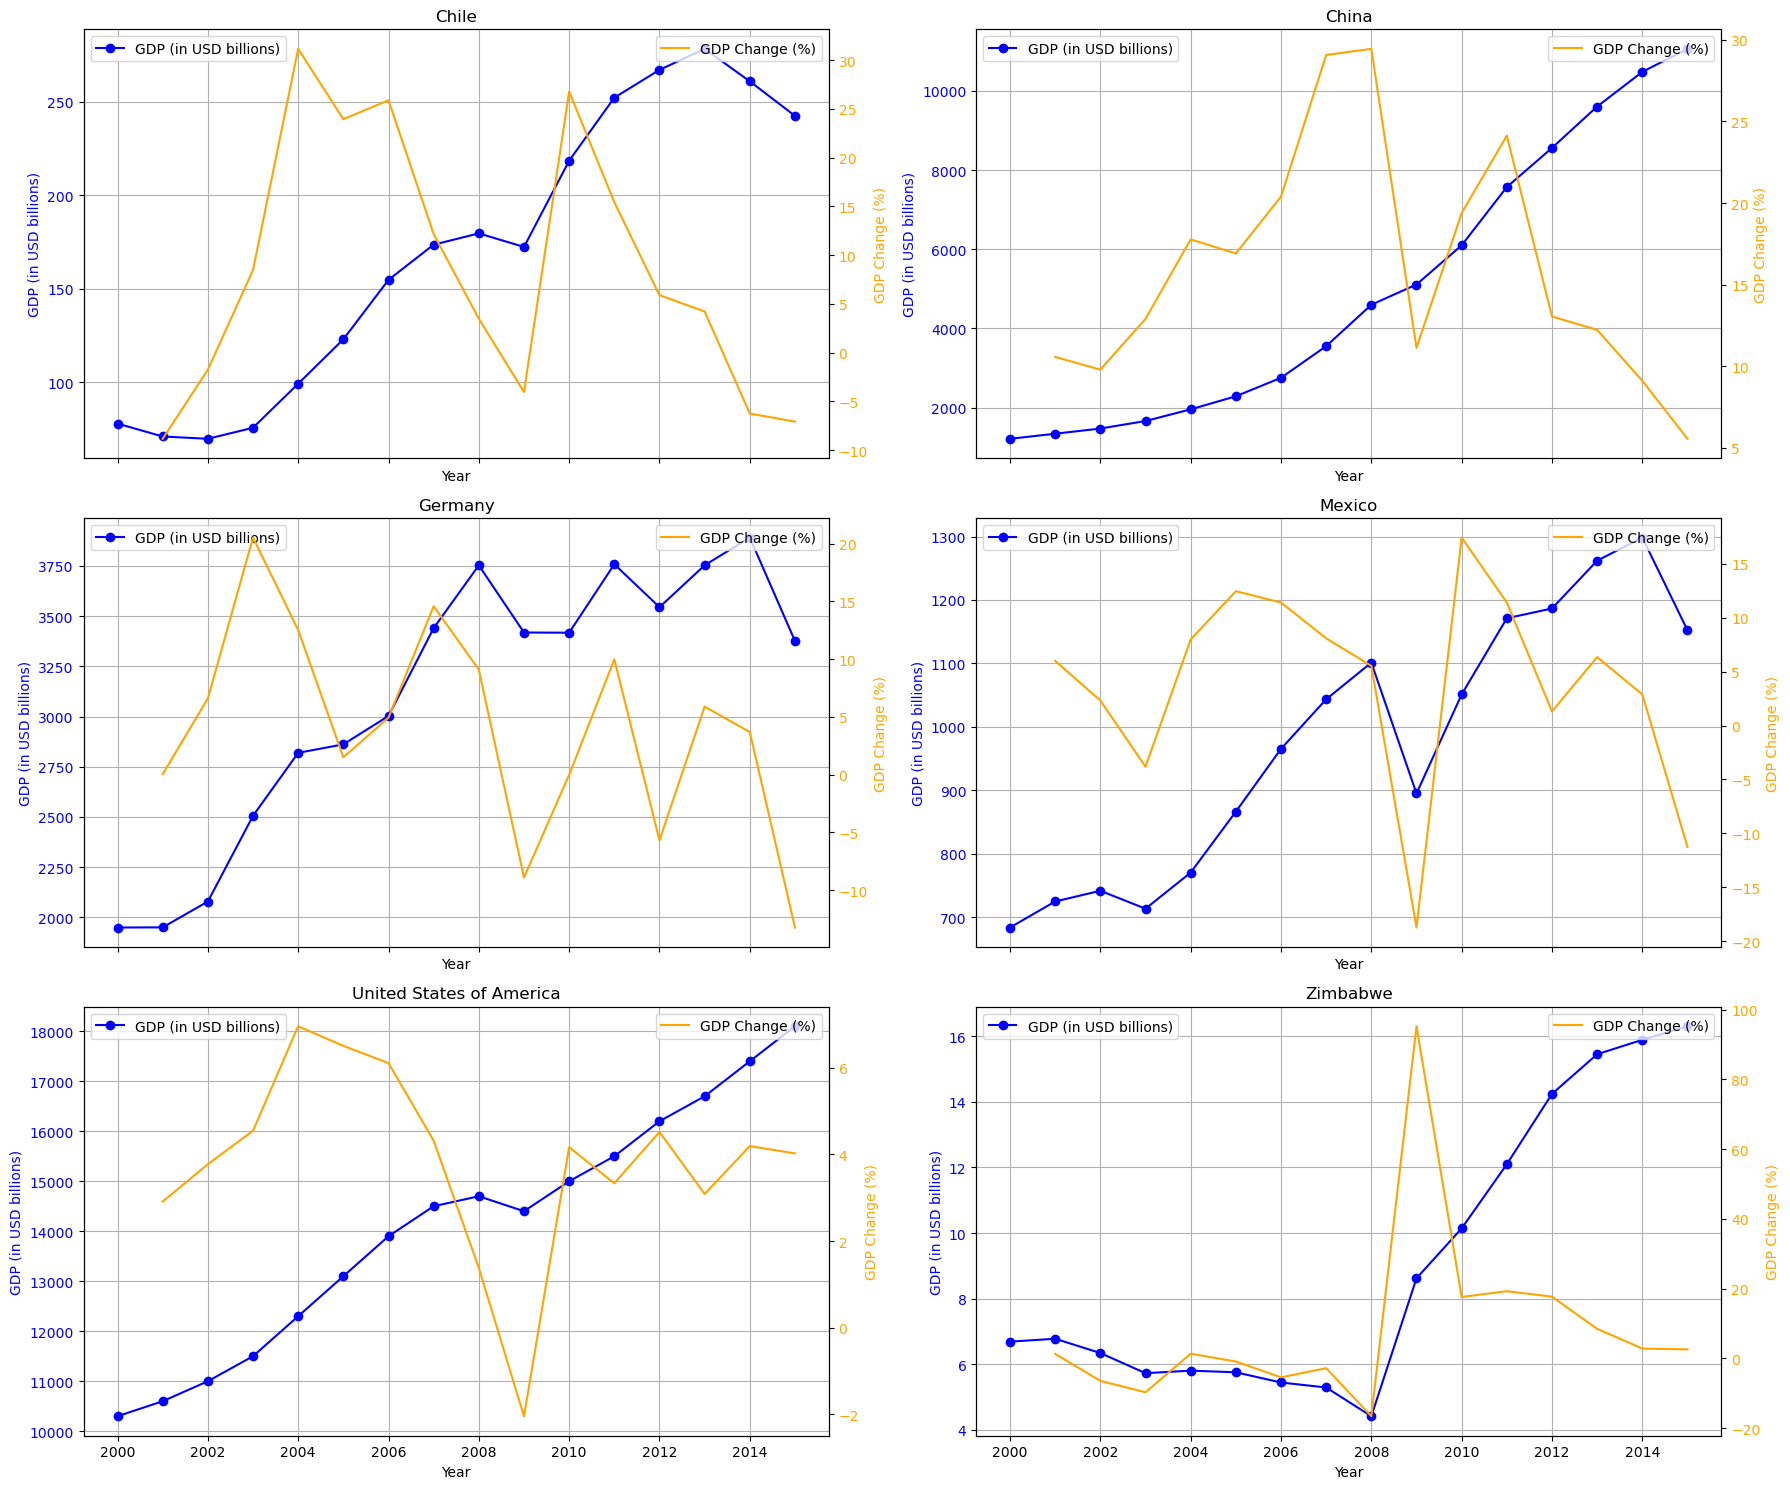

In [8]:
# Calculate average GDP and percentage change
gdp_trend = (
    df.groupby(['Country', 'Year'])['GDP_in_billions']
    .mean()
    .reset_index()
    .sort_values(by=['Country', 'Year'])
)
gdp_trend['GDP_Change_Percent'] = gdp_trend.groupby('Country')['GDP_in_billions'].pct_change() * 100

# Define plot layout (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(18, 15), sharex=True)
axes = axes.flatten()  # Flatten the 3x2 array to easily iterate over it

# Plot data for each country
for i, country in enumerate(gdp_trend['Country'].unique()):
    country_data = gdp_trend[gdp_trend['Country'] == country]
    ax1 = axes[i]
    ax1.plot(country_data['Year'], country_data['GDP_in_billions'], 'o-b', label='GDP (in USD billions)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP (in USD billions)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()
    ax2.plot(country_data['Year'], country_data['GDP_Change_Percent'], 'orange', label='GDP Change (%)')
    ax2.set_ylabel('GDP Change (%)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax1.set_title(country)
    ax1.grid(True)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

__Chile:__ GDP steadily increased over the years, with notable fluctuations in the GDP change percentage, peaking around 2004 and 2010. <br>

__China:__ Exhibited a significant and consistent rise in GDP, reflecting rapid economic growth. The GDP change percentage shows sharp peaks and troughs, indicative of high growth rates.<br>

__Germany:__ GDP increased steadily, though the growth rate varied significantly year to year, with several noticeable peaks and declines in the GDP change percentage.<br>

__Mexico:__ Showed a general upward trend in GDP, with more variability in the growth rate, as evidenced by the fluctuating GDP change percentage.<br>

__United States:__ GDP grew steadily, but with less volatility in the growth rate compared to other nations, as the GDP change percentage remained relatively stable.<br>

__Zimbabwe:__ GDP increased over time but was much lower compared to the other countries. The GDP change percentage showed extreme volatility, indicating an unstable economic environment.<br>

Overall, while most countries experienced a steady rise in GDP, the growth rates varied widely, with China and Zimbabwe showing the most dramatic changes.

                    Country  GDP_in_billions  Life expectancy at birth (years)
0                     Chile            169.8                              78.9
1                     China           4957.7                              74.3
2                   Germany           3094.8                              79.7
3                    Mexico            976.7                              75.7
4  United States of America          14075.0                              78.1
5                  Zimbabwe              9.1                              50.1
Pearson correlation coefficient: 0.35
P-value: 0.4932


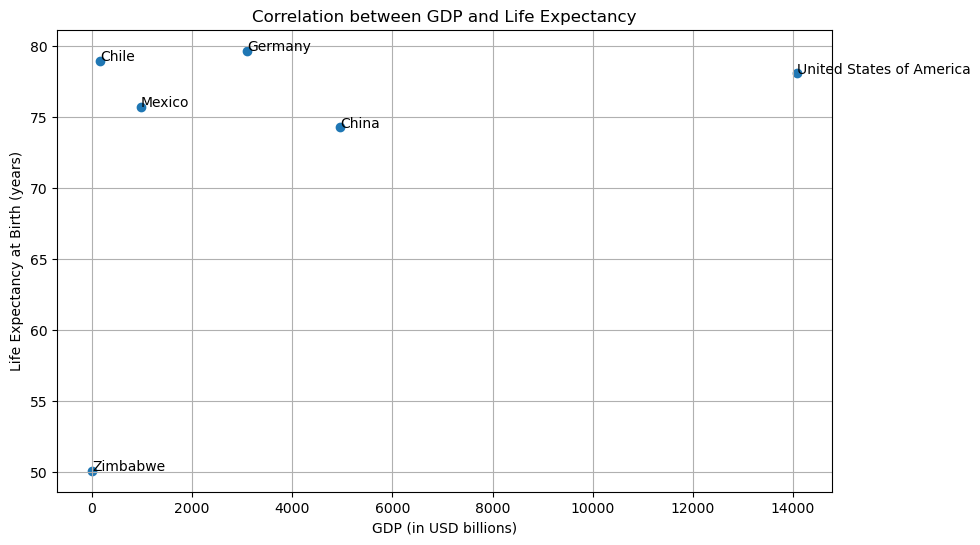

In [9]:
# Calculate average GDP and Life Expectancy by country
gdp_life_expectancy = df.groupby('Country').agg({
    'GDP_in_billions': 'mean',
    'Life expectancy at birth (years)': 'mean'
}).reset_index()
print(gdp_life_expectancy)

# Calculate Pearson correlation coefficient
try:
    correlation, p_value = pearsonr(gdp_life_expectancy['GDP_in_billions'], gdp_life_expectancy['Life expectancy at birth (years)'])
    print(f"Pearson correlation coefficient: {correlation:.2f}")
    print(f"P-value: {p_value:.4f}")
except Exception as e:
    print(f"An error occurred: {e}")

# Plot the correlation
plt.figure(figsize=(10, 6))
plt.scatter(gdp_life_expectancy['GDP_in_billions'], gdp_life_expectancy['Life expectancy at birth (years)'])
plt.title('Correlation between GDP and Life Expectancy')
plt.xlabel('GDP (in USD billions)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.grid(True)

# Add annotations
for i, row in gdp_life_expectancy.iterrows():
    plt.annotate(row['Country'], (row['GDP_in_billions'], row['Life expectancy at birth (years)']))

plt.show()

                    Country  GDP_in_billions  Life expectancy at birth (years)
0                     Chile            169.8                              78.9
1                     China           4957.7                              74.3
2                   Germany           3094.8                              79.7
3                    Mexico            976.7                              75.7
4  United States of America          14075.0                              78.1
5                  Zimbabwe              9.1                              50.1
Pearson correlation coefficient: 0.35
P-value: 0.4932


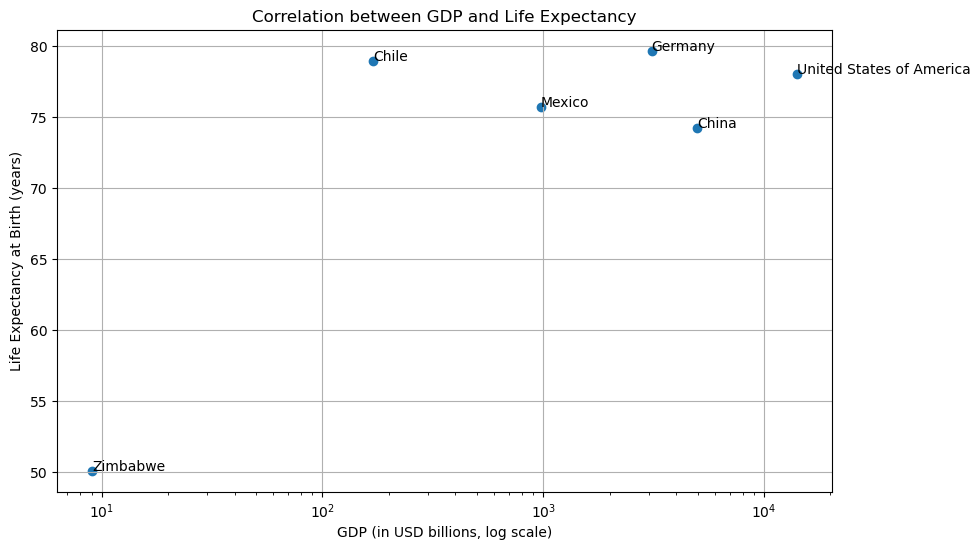

In [10]:
# Calculate average GDP and Life Expectancy by country
gdp_life_expectancy = df.groupby('Country').agg({
    'GDP_in_billions': 'mean',
    'Life expectancy at birth (years)': 'mean'
}).reset_index()

print(gdp_life_expectancy)

# Calculate Pearson correlation coefficient
try:
    correlation, p_value = pearsonr(gdp_life_expectancy['GDP_in_billions'], gdp_life_expectancy['Life expectancy at birth (years)'])
    print(f"Pearson correlation coefficient: {correlation:.2f}")
    print(f"P-value: {p_value:.4f}")
except Exception as e:
    print(f"An error occurred: {e}")

# Plot the correlation with a logarithmic scale for GDP
plt.figure(figsize=(10, 6))
plt.scatter(gdp_life_expectancy['GDP_in_billions'], gdp_life_expectancy['Life expectancy at birth (years)'])
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Correlation between GDP and Life Expectancy')
plt.xlabel('GDP (in USD billions, log scale)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.grid(True)

# Add annotations
for i, row in gdp_life_expectancy.iterrows():
    plt.annotate(row['Country'], (row['GDP_in_billions'], row['Life expectancy at birth (years)']))

plt.show()

A coefficient of 0.35 suggests a moderate positive relationship. As GDP increases, life expectancy tends to increase, but the relationship is not perfectly linear. This means that while higher GDP is generally associated with higher life expectancy, other factors also play a significant role.

__Positive Trend:__ Countries with higher GDP generally have higher life expectancy, which aligns with the expectation that wealthier countries can afford better healthcare and living conditions.<br>
__Moderate Strength:__ The moderate correlation implies that while GDP is a relevant factor for life expectancy, it’s not the sole determinant. There could be other influential variables, such as healthcare quality, education, and lifestyle factors, affecting life expectancy.<br>

A p-value of 0.4932 means that the observed correlation between GDP and life expectancy is not statistically significant at common significance levels (e.g., 0.05). This suggests that the relationship between GDP and life expectancy in your sample might not be strong enough to be considered a true or reliable effect, and it could be due to chance.

Let's assess the same correlation but for each country separately:

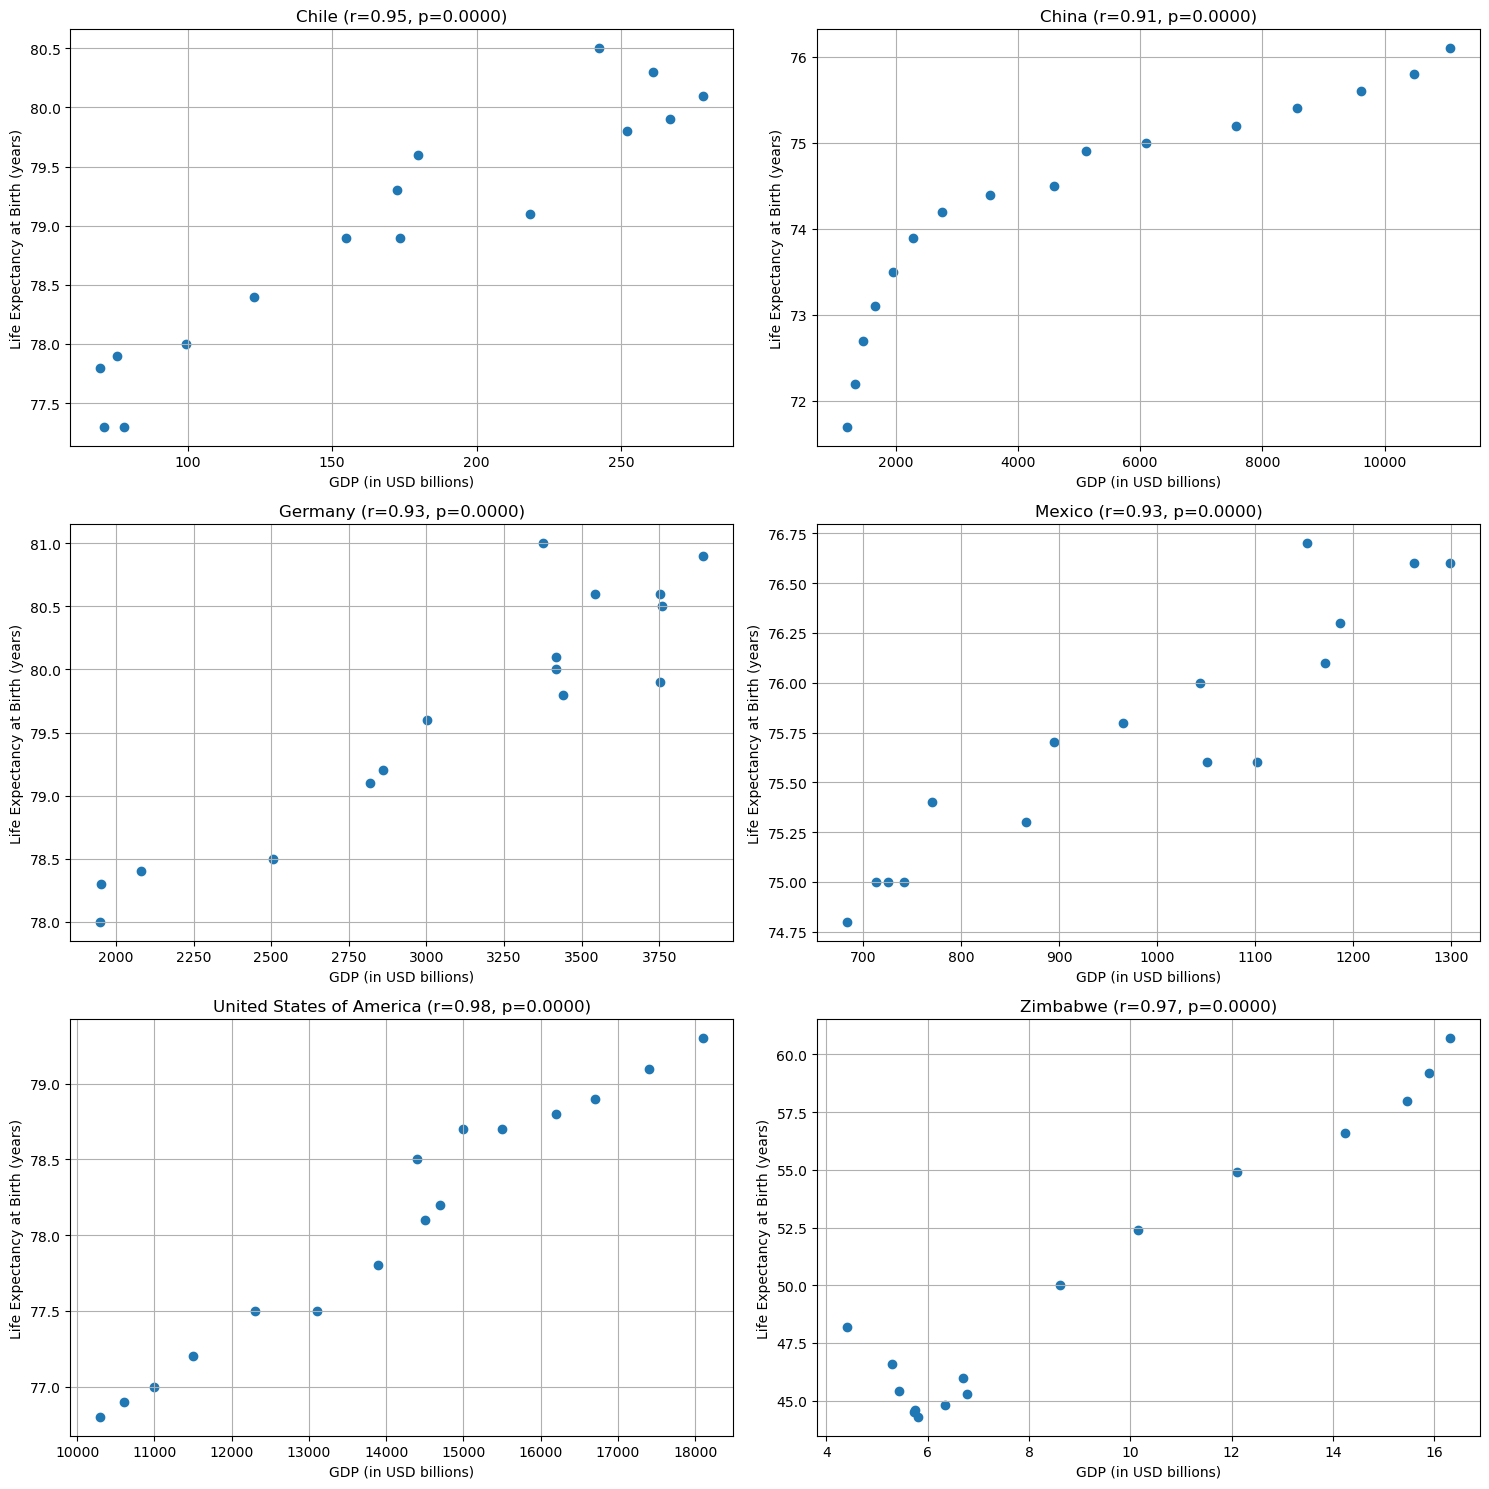

In [11]:
# Get unique countries
countries = df['Country'].unique()

# Set up the plot layout (adjust based on the number of countries)
num_countries = len(countries)
fig, axes = plt.subplots((num_countries + 1) // 2, 2, figsize=(15, (num_countries + 1) // 2 * 5))
axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = df[df['Country'] == country]
    
    # Calculate Pearson correlation coefficient for the country
    try:
        correlation, p_value = pearsonr(country_data['GDP_in_billions'], country_data['Life expectancy at birth (years)'])
        axes[i].scatter(country_data['GDP_in_billions'], country_data['Life expectancy at birth (years)'])
        axes[i].set_title(f'{country} (r={correlation:.2f}, p={p_value:.4f})')
        axes[i].set_xlabel('GDP (in USD billions)')
        axes[i].set_ylabel('Life Expectancy at Birth (years)')
        axes[i].grid(True)
    except Exception as e:
        print(f"An error occurred for {country}: {e}")
        axes[i].set_title(f'{country} - Error')
        axes[i].set_xlabel('GDP (in USD billions)')
        axes[i].set_ylabel('Life Expectancy at Birth (years)')
        axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

On a national level, the higher the GDP, life expectancy is also higher. Pearson coefficient ranging from 0.91 to 0.98 suggests extremely high positive correlation and p-value of 0.0000 is statistically significant at common significance level.

In [12]:
# Calculate average life expectancy by country
average_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].mean().reset_index()
average_life_expectancy.columns = ['Country', 'Average Life Expectancy']
average_life_expectancy = average_life_expectancy.sort_values(by='Average Life Expectancy')

print(average_life_expectancy)

                    Country  Average Life Expectancy
5                  Zimbabwe                     50.1
1                     China                     74.3
3                    Mexico                     75.7
4  United States of America                     78.1
0                     Chile                     78.9
2                   Germany                     79.7


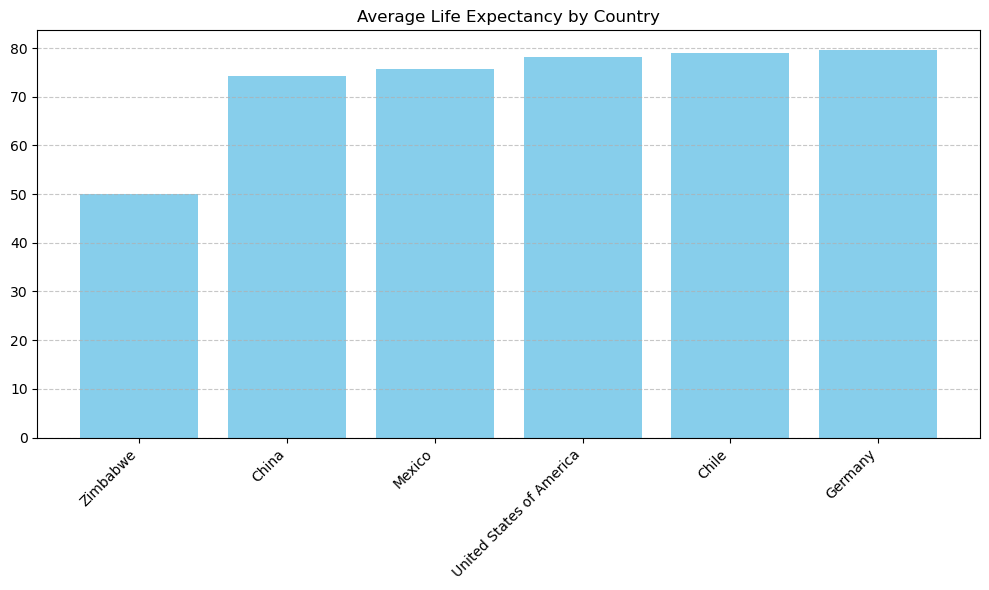

In [20]:
# Plot the average life expectancy by country
plt.figure(figsize=(10, 6))
plt.bar(average_life_expectancy['Country'], average_life_expectancy['Average Life Expectancy'], color='skyblue')
#plt.xlabel('Country')
#plt.ylabel('Average Life Expectancy at Birth (years)')
plt.title('Average Life Expectancy by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

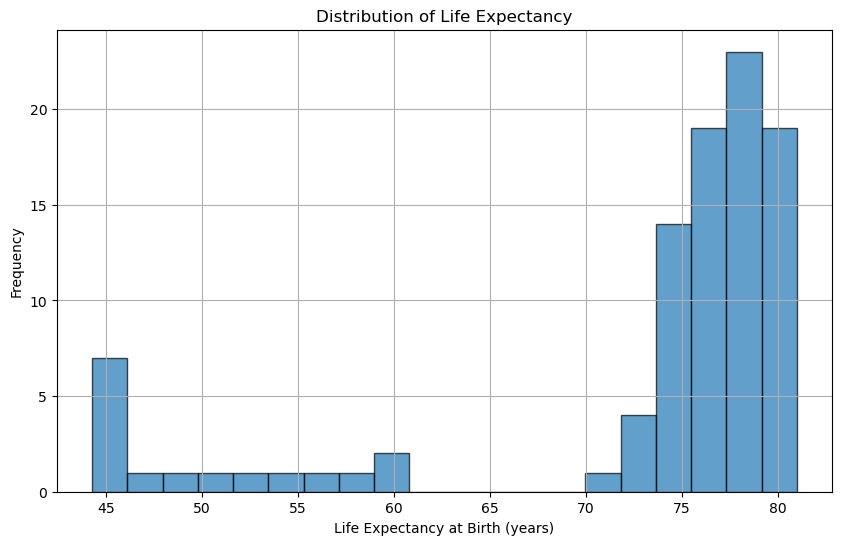

In [27]:
# Plot the distribution of life expectancy
plt.figure(figsize=(10, 6))
plt.hist(df['Life expectancy at birth (years)'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram reveals a bimodal distribution with two distinct peaks:

One cluster around the life expectancy of 45 years (Zimbabwe). Another cluster around the life expectancy between 75 and 80 years.<br>The bimodal distribution highlights disparities in healthcare and development between different regions. Countries in the higher life expectancy range likely have better healthcare systems, higher incomes, and better overall living conditions.

Let's see how life expectancy changed in absolute numbers

                          first  last  Change  Percentage Change
Country                                                         
Zimbabwe                   46.0  60.7    14.7               32.0
China                      71.7  76.1     4.4                6.1
Chile                      77.3  80.5     3.2                4.1
Germany                    78.0  81.0     3.0                3.8
United States of America   76.8  79.3     2.5                3.3
Mexico                     74.8  76.7     1.9                2.5


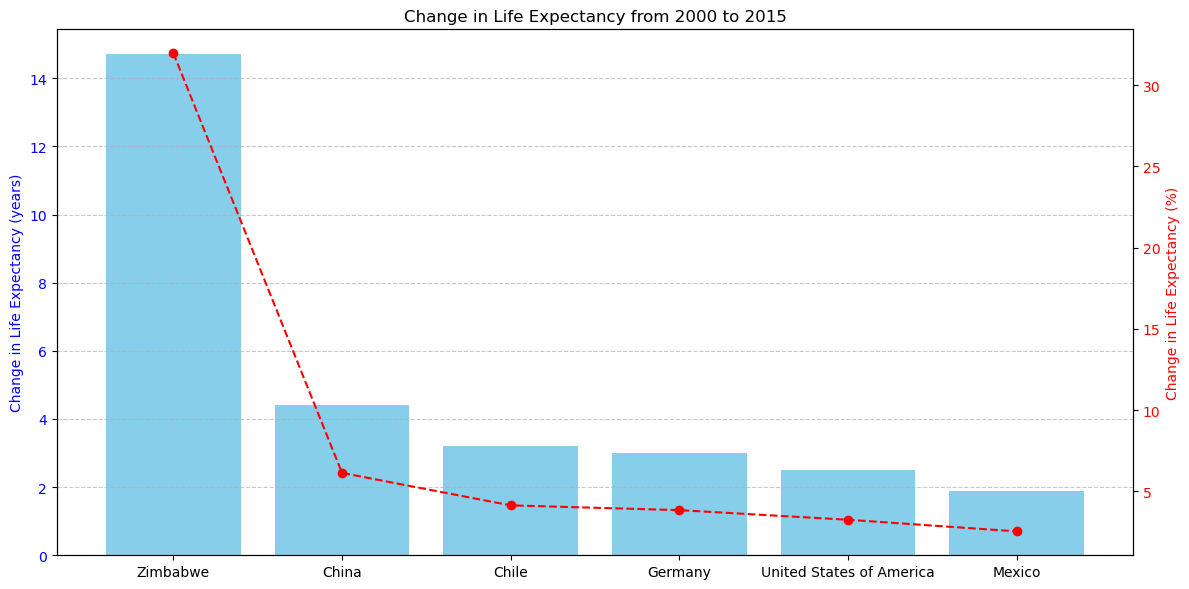

In [23]:
# Calculate the absolute and percentage change in life expectancy
life_expectancy_change = df.groupby('Country')['Life expectancy at birth (years)'].agg(['first', 'last'])
life_expectancy_change['Change'] = life_expectancy_change['last'] - life_expectancy_change['first']
life_expectancy_change['Percentage Change'] = (life_expectancy_change['Change'] / life_expectancy_change['first']) * 100
life_expectancy_change = life_expectancy_change.sort_values(by='Change', ascending=False)

print(life_expectancy_change)

# Plot the changes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the absolute change in life expectancy
ax1.bar(life_expectancy_change.index, life_expectancy_change['Change'], color='skyblue')
#ax1.set_xlabel('Country')
ax1.set_ylabel('Change in Life Expectancy (years)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Change in Life Expectancy from 2000 to 2015')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for the percentage change
ax2 = ax1.twinx()
ax2.plot(life_expectancy_change.index, life_expectancy_change['Percentage Change'], color='red', marker='o', linestyle='dashed')
ax2.set_ylabel('Change in Life Expectancy (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot visually represents changes in life expectancy between 2000 and 2015, highlighting Zimbabwe's notable improvement in life expectancy over the 15-year period.<br>

__Zimbabwe__ experienced the highest increase in life expectancy, with a significant rise of 14.7 years (from 46.0 to 60.7 years) and 32% increase.<br>
__China__ saw an increase of 4.4 years (from 71.7 to 76.1 years) and 6.1% increase.<br>
__Chile__ had an increase of 3.2 years (from 77.3 to 80.5 years) and 4.1% increase.<br>
__Germany__ experienced an increase of 3.0 years (from 78.0 to 81.0 years) and 3.8% increase.<br>
__USA__ saw an increase of 2.5 years (from 76.8 to 79.3 years) and 3.3% increase.<br>
__Mexico__ had the smallest increase among the listed countries, with an increase of 1.9 years (from 74.8 to 76.7 years) and 2.5% increase.

__Trends Over Time__

__Life Expectancy Trends:__
All countries show an increase in life expectancy over time.
Zimbabwe experienced the most significant improvement, suggesting substantial health and economic progress.
Countries like Germany, the U.S., and Chile had more stable but steady increases, indicating continuous improvement in their advanced healthcare systems.
China and Mexico also showed consistent upward trends.

__GDP Trends:__
Chile: Steady GDP growth with notable fluctuations in growth rate.
China: Significant and consistent GDP rise with sharp changes in growth rate.
Germany: Steady GDP increase with noticeable fluctuations in growth rate.
Mexico: General upward trend with more variability in growth rate.
United States: Steady GDP growth with relatively stable growth rate.
Zimbabwe: Low GDP with extreme volatility in growth rate.

__Summary__<br>
Positive Trend: Higher GDP generally correlates with higher life expectancy, but the relationship is not perfectly linear or statistically significant across all countries.
National Insights: Individual country analyses reveal that while GDP is a factor in life expectancy, other regional and national variables play a significant role.
Distribution: The bimodal distribution of life expectancy highlights global disparities in healthcare and development.